In [1]:
import os
import numpy as np
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_columns', None) # 모든 컬럼 다보기
pd.set_option('display.max_rows', None) # 행 열개까지만 보여주기

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

# 데이터 로드 및 기초 전처리
---
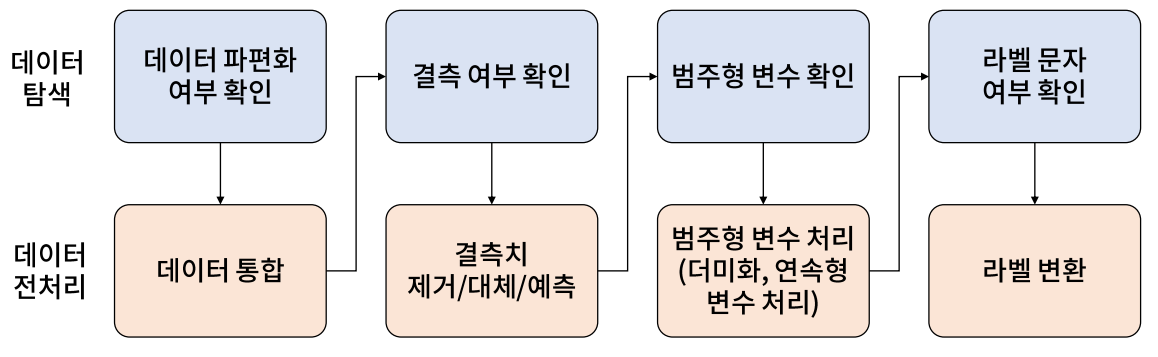

고객의 데이터를 바탕으로 이탈 고객을 예측하는 실습데이터

In [2]:
df = pd.read_csv("Telco_churn_prediction.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 기초 데이터 탐색

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 데이터 분리 및 결측치 확인

In [4]:
# customerID는 특징으로서 기능을 못하기 때문에 drop (drop하지 않고 사용하려면 set_index활용)
# 특징과 라벨(=churn) 분리
X = df.drop(['customerID', 'Churn'], axis = 1)
Y = df['Churn']

In [5]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [6]:
# 결측치 확인
Train_X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
# 특징별 타입 확인 
Train_X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

- df.head()로 봤을때는 숫자값이 었는데 TotalCharges가 object이다. 확인 필요

In [8]:
# sorted로 크기 순으로 정렬
sorted(Train_X['TotalCharges'].unique()) 

# 맨 위에 공백으로 표현된 결측값이 포함되어있음을 알 수 있다.

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.8',
 '100.9',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1005.7',
 '1006.9',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.6',
 '1023.75',
 '1023.85',
 '1023.9',
 '1024',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1046.1',
 '1046.2',
 '1046.5',
 '1047.7',
 '1048.45',
 '1048.85',
 '1049.05',
 '105.5',
 '105.6',
 '1050.5',
 '1052.35',
 '1052.4',
 '1054.6',
 '1054.75',
 '1054.8',
 '1055.9',
 '1056.95',
 '1057',
 '1057.55',
 '1057.85',
 '10

In [9]:
# 위와 같은 현상이 TotalCharges 특징에만 있다 장담할 수 없음
# 모든 특징의 공백을 결측으로 변환해줄 필요가 있다.

for col in Train_X.columns: #모든 columns를 대상으로 for문
    Train_X[col].replace(' ', np.nan, inplace = True) #공백을 NaN으로 바꾸고 inplace한다.
    Test_X[col].replace(' ', np.nan, inplace = True)

In [10]:
# 결측 재확인
Train_X.isnull().sum().sort_values(ascending = False) # TotalCharges에만 결측이 있음을 확인

# TotalCharges에만 결측이 있으며, 전체 샘플수(7043)을 고려하면 결측 개수가 많지 않다. => 일반적이라면 삭제 
# 하지만 행을 삭제하는 것은 보류 => 새로운 데이터에도 결측이 없으리란 보장이 없기 때문

TotalCharges        11
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
gender               0
SeniorCitizen        0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
OnlineBackup         0
dtype: int64

## 결측처리 방법 선택
---
- NaN 값을 drop하지 않기로 정했으므로, 대체 or 채워넣기를 해야 한다.
- (도메인) 변수명을 보았을때 TotalCharges와 MonthlyCharges가 상관성이 있을 것이라 가정(상호 영향 줄 수 있을 것)
- 따라서, 예측 모델을 통한 결측치 전처리를 진행
- 실제 진행에 앞서 두 데이터가 상관관계가 있는지 확인 

In [11]:
import copy
cor_Train_X = copy.copy(Train_X)
cor_Train_X['TotalCharges']=Train_X['TotalCharges'].astype(float)

cor_Train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 5038 to 5853
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   objec

In [12]:
cor_Train_X.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015617,0.217457,0.095988
tenure,0.015617,1.000000,0.261458,0.832341
MonthlyCharges,0.217457,0.261458,1.000000,0.651195
TotalCharges,0.095988,0.832341,0.651195,1.000000


- 실제 두 변수간 상관관계가 0.6으로 높은 편에 속하므로 **예측 모델**을 통해 결측치 처리를 하는 것에 문제가 없으리라 판단.

In [13]:
# 범주형 변수를 처리할 때 Total Charges는 당연히 범주형으로 취급되면 안되므로, float으로 바꿔놓기
Train_X['TotalCharges'] = Train_X['TotalCharges'].astype(float)

## 범주형 변수 파악

In [14]:
# 위의 데이터 탐색에서 TotalCharges를 제외한 나머지 object변수가 범주형이었음을 확인
# 이미 TotalCharges를 float으로 변형시켰으므로 간단하게 object 타입의 컬럼들에 대한 컬럼명을 리스트로 변경
category_columns = Train_X.select_dtypes(include = 'object').columns.tolist()

# One Hot encoding할때 입력을 list로 받아서 tolist를 사용하기 때문에 미리 추출과정에서 자료형을 변경함.

## 범주형 변수 더미화

In [15]:
# 범주형 변수 더미화
from feature_engine.encoding import OneHotEncoder as OHE

# 위에서 파악한 범주형 컬럼 리스트 입력
# drop_last로 마지막에 생성한 dummy는 drop(계산량 감소)
make_dummy_model = OHE(variables = category_columns, drop_last = True).fit(Train_X)

# OHE는 결과값이 DF로 출력되기 때문에 별도 변경 과정 필요 없음
Train_X = make_dummy_model.transform(Train_X)
Test_X = make_dummy_model.transform(Test_X)

## 예측 모델로 결측치 처리

In [16]:
# KNN Imputer 인스턴스
from sklearn.impute import KNNImputer
KI = KNNImputer(n_neighbors = 5)

# KNN Imputer fitting
KI.fit(Train_X)

# 예측한 값으로 결측 대체
Train_X = pd.DataFrame(KI.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(KI.transform(Test_X), columns = Test_X.columns)

## 라벨 분포 & 문자여부 확인

In [17]:
# 라벨 분포 확인
# 문자로 되어 있음을 확인  (No:유지된 고객, Yes : 이탈한 고객)
# 클래스 불균형 정도가 크지는 않아 보인다. 
Train_Y.value_counts()

No     3837
Yes    1445
Name: Churn, dtype: int64

### 라벨 변환 (문자 -> 숫자)

In [18]:
Train_Y.replace({"No":-1, "Yes":1}, inplace = True)
Test_Y.replace({"No":-1, "Yes":1}, inplace = True)

In [19]:
# 각 특징의 유형이 서로 다른 형태
# 유니크한 값의 개수를 바탕으로 각 특징의 상태공간을 확인하고, 연속형과 이진형 변수 구분
# dummy화를 하는 과정에서 범주형은 0또는 1로 변경되었다. -> unique값이 2개 혹은 그 이하이면 범주형
continuous_cols = [col for col in Train_X.columns if len(Train_X[col].unique()) > 2]
binary_cols = [col for col in Train_X.columns if len(Train_X[col].unique()) <= 2]

# 모델 성능 향상을 위한 전처리
---

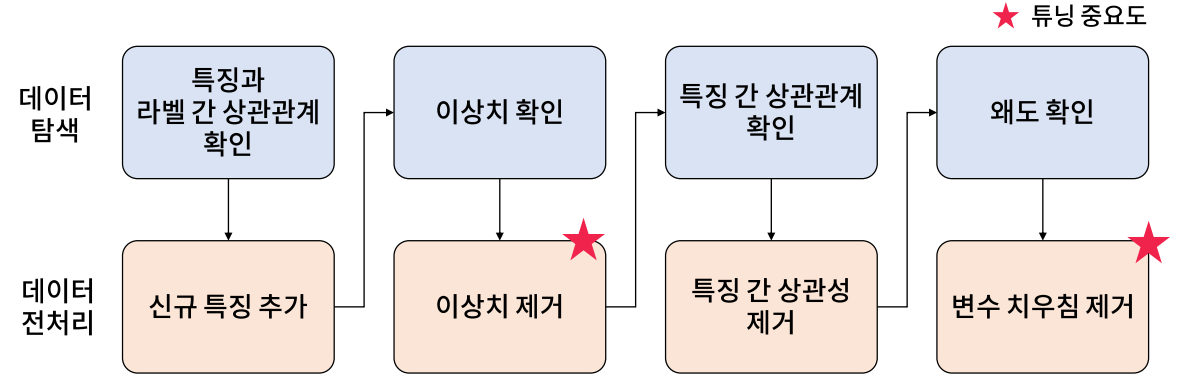!

## 이상치 확인 by IQR Rule (연속형 변수)

In [20]:
def IQR_rule(val_list): # 한 특징에 포함된 값 (열 벡터)
    # IQR 계산 
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    # IQR rule을 위배하지 않는 bool list 계산 (True: 이상치 X, False: 이상치 O)
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

In [21]:
num_outliers = len(Train_X) - Train_X[continuous_cols].apply(IQR_rule).sum(axis = 0) 
print(num_outliers) # 특별한 이상치 없음 => 제거 할 데이터가 없음

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


## 왜도 (skew) 확인 (연속형 변수)
- 이진형 변수는 치우침이 있어도 해결 방법이 없으므로 굳이 확인하지 않는다.(어차피 모든 값이 0 또는 1)
- 유일한 해결법이라면 특징 선택을 통한 feature삭제

In [22]:
# 모든 연속형 변수 모두 치우침이 없음
# 일반적으로 왜도값이 1.5이상이면 변수에 치우침이 있다고 판단
Train_X[continuous_cols].skew() 

tenure            0.244881
MonthlyCharges   -0.234422
TotalCharges      0.949624
dtype: float64

In [23]:
# 모델 선택을 위한 데이터 크기 확인
Train_X.shape

(5282, 30)

- 샘플 대비 특징이 많지 않다. 더욱이 대부분 이진형이다.
- 특징이 늘어난 원인도 더미화를 했기 때문이다. 
- 대부분의 값이 이진형이기 때문에 결정공간이 많이 필요하지 않다.
- 이런 면에서 보았을때 샘플의 수는 적절한 편이라 하라 수 있다.

**결론**
- 위의 이진형 특징이 더 많은 데이터는 각 특징이 제대로 반영될때 더 좋은 성능을 낼수 있을 것이다.
- Decision Tree는 모든 특성을 반영하기 어렵다.
- 따라서 앙상블 계열의 모델을 사용하여 예측 하는 것이 바람직할 것이라 판단.

# 모델링

## 모델 생성 및 파라미터 튜닝

In [24]:
# 특징 선택과 모델 하이퍼 파라미터 튜닝
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier as LGBM
from sklearn.feature_selection import *
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score

# 모델 파라미터 그리드 설계
model_parameter_grid = dict() # 파라미터와 value를 dict형태로 입력

#max_depth는 과적합 방지를 위해 크게 잡지 않는 것이 좋다.
model_parameter_grid[RFC] = ParameterGrid({"max_depth": [2, 3, 4],
                                          "n_estimators": [50, 100]})

# 일반적으로 사용되는 learning_rate의 범위(0.1~0.2)를 사용
model_parameter_grid[XGB] = ParameterGrid({"max_depth": [2, 3, 4],
                                          "n_estimators": [50, 100],
                                          "learning_rate": [0.05, 0.1, 0.15, 0.2],
                                          "eval_metric" : ['mlogloss', 'logloss']})

model_parameter_grid[LGBM] = ParameterGrid({"max_depth": [2, 3, 4],
                                          "n_estimators": [50, 100],
                                           "learning_rate": [0.05, 0.1, 0.15, 0.2]})

## 특징 선택

In [25]:
# 서로 다른 두 통계량 기준을 비교하기 어려움 -> p-value로 측정
# f_regression(X, Y) => 결과값 : (statistics, p-value) 
continous_cols_pvals = f_classif(Train_X[continuous_cols], Train_Y)[1] #연속형은 f_classif, [1]이 p-value
binary_cols_pvals = chi2(Train_X[binary_cols], Train_Y)[1] # 이진형은 chi2, [1]이 p-value

In [26]:
# 각각을 Series로 변환 (value: pvalue, index: colum name)
cont_pvals = pd.Series(continous_cols_pvals, index = continuous_cols)
binary_pvals = pd.Series(binary_cols_pvals, index = binary_cols)

In [27]:
# cont_pvals과 binary_pvals을 concat
pvals = pd.concat([cont_pvals, binary_pvals])
pvals.sort_values(ascending = True, inplace = True) # 오름차순으로 정렬 (앞에 나올수록 좋은 특징->p-value)

In [28]:
# 튜닝 시작
best_score = 0 # 기준이 f1-score이므로

# 선택할 특징 개수 튜닝
# 30개를 기준으로 최소 6까지
for k in range(30, 5, -1): 
    print('Current k is',k)
    s_Train_X = Train_X[pvals.iloc[:k].index] # p-value가 낮은 k번째 인덱스의 특징을 train 특징에 할당
    s_Test_X = Test_X[pvals.iloc[:k].index]
    
    # 미리 지정한 파라미터 그리드
    for M in model_parameter_grid.keys():
        for P in model_parameter_grid[M]: # 각 모델별 파라미터 그리드설정 입력
            
            # 모델 학습
            model = M(**P).fit(s_Train_X, Train_Y) ## '**'는 P를 불러와 수식하기 위해 사용 (제곱 X)
            
            # 예측
            pred_Y = model.predict(s_Test_X)
            
            # 평가
            score = f1_score(Test_Y, pred_Y)
            
            # 지정된 k값의 score가 이전 best_score보다 높으면 update
            if score > best_score:
                best_score = score
                best_feature = s_Train_X.columns
                best_model = M
                best_parameter = P

print('Best model is:',best_model)
print('Best_features are :', best_feature)

Current k is 30
Current k is 29
Current k is 28
Current k is 27
Current k is 26
Current k is 25
Current k is 24
Current k is 23
Current k is 22
Current k is 21
Current k is 20
Current k is 19
Current k is 18
Current k is 17
Current k is 16
Current k is 15
Current k is 14
Current k is 13
Current k is 12
Current k is 11
Current k is 10
Current k is 9
Current k is 8
Current k is 7
Current k is 6
Best model is: <class 'lightgbm.sklearn.LGBMClassifier'>
Best_features are : Index(['tenure', 'Contract_Two year', 'InternetService_Fiber optic',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No',
       'OnlineBackup_No internet service', 'TotalCharges', 'MonthlyCharges',
       'Contract_One year', 'OnlineSecurity_Yes', 'SeniorCitizen',
       'TechSupport_Yes', 'PaperlessBilling_Yes', 'Partner_No',
       'Payme